# Model Evaluation - English 1

## 0. Imports

In [47]:
import pandas as pd

from sklearn.model_selection import train_test_split

from data_analyzing.data_analyzer import DataAnalyzer
from evaluation.model_evaluator import ModelEvaluator
from training.model import Model

## 1. Loading dataset

In [48]:
COVID_PREPROCESSED_DATA_PATH = "D:\SEM6/NLP/NLP_last_3/NLP-Fake-News-Detection\data\preprocessed\spanish"

In [49]:
data_json = pd.read_json(COVID_PREPROCESSED_DATA_PATH, orient="records", lines=True)

In [50]:
# dataset_1 = data_json.loc[data_json['label'] == 1].head(20)
# dataset_0 = data_json.loc[data_json['label'] == 0].head(20)

dataset_1 = data_json.loc[data_json['label'] == 1].head(500)
dataset_0 = data_json.loc[data_json['label'] == 0].head(500)

dataset = pd.concat([dataset_1, dataset_0])
dataset = dataset.sample(frac=1, random_state=10)

In [51]:
train_data, test_data = train_test_split(dataset, train_size=0.8, random_state=42)

## 2. Loading model

In [52]:
COVID_MODEL_V1_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/model/covid/model_v1.h5py"

In [53]:
model_covid_v1 = Model.load_saved_model(COVID_MODEL_V1_PATH, useGPU=False)

All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

All the layers of TFXLMRobertaForSequenceClassification were initialized from the model checkpoint at D:\SEM6/NLP/NLP_last_3/NLP-Fake-News-Detection\model\spanish\spanish_bert.h5py.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForSequenceClassification for predictions without further training.


#### 2.1 Train data

Accuracy:   0.97125
Precision:  0.98947
Recall:     0.9519
F1 score:   0.97032




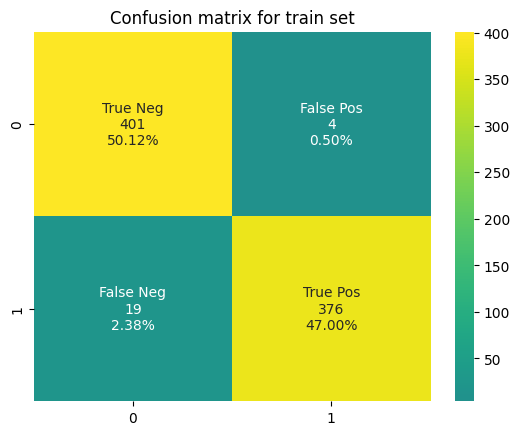

([0.97125, 0.98947, 0.9519, 0.97032],
 [0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  

In [54]:
ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=train_data,
    set_type="train"
)

#### 2.2 Test data

Accuracy:   0.965
Precision:  0.97115
Recall:     0.9619
F1 score:   0.96651




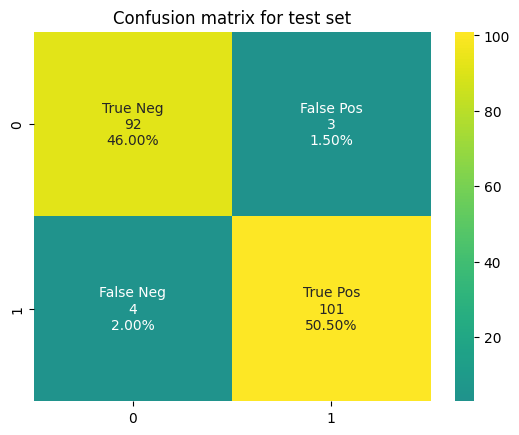

In [55]:
scores, y_true, y_pred = ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=test_data,
    set_type="test"
)

In [56]:
test_data_correctly_predicted_model_v1 = ModelEvaluator.get_correctly_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

In [57]:
test_data_false_predicted_model_v1 = ModelEvaluator.get_false_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

## 3. Results Analyzing

#### 3.1 Polarity

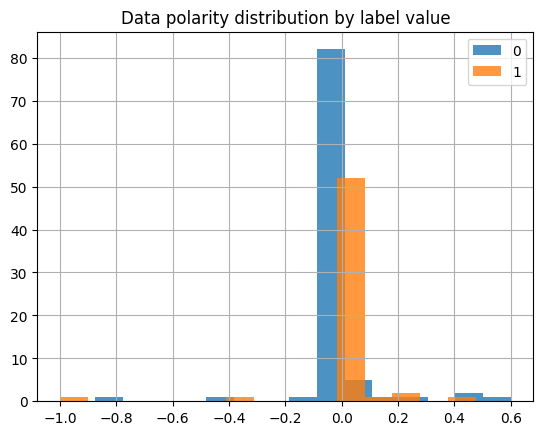

In [58]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_correctly_predicted_model_v1)

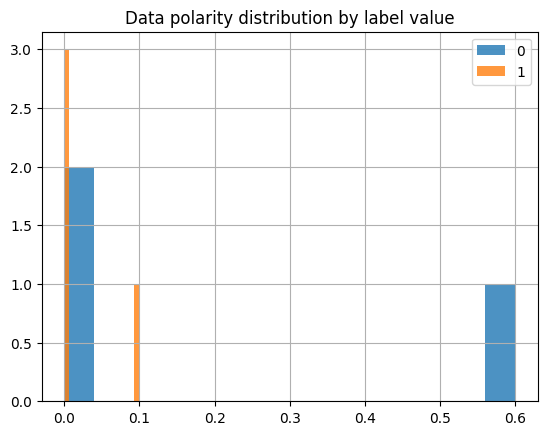

In [59]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.2 Subjectivity

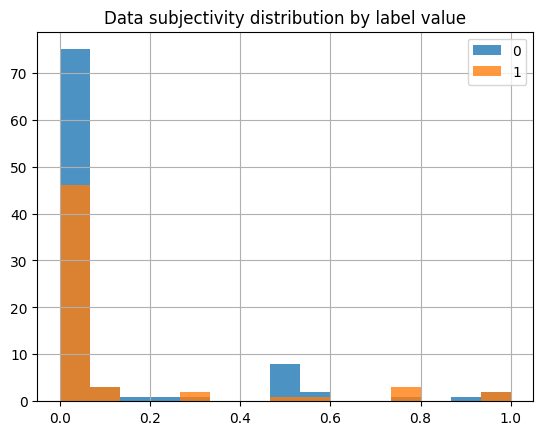

In [60]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_correctly_predicted_model_v1)

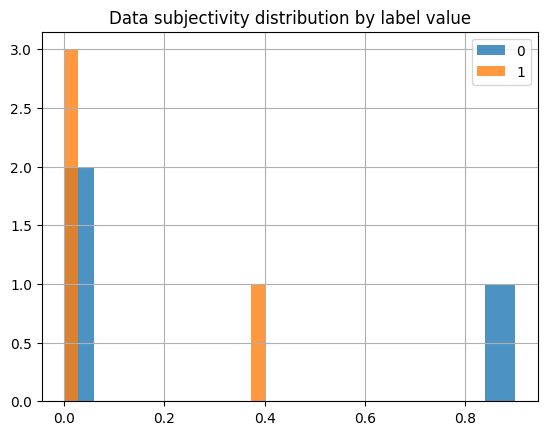

In [61]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.3 Most Popular Words map

In [62]:
most_popular_words_correct = DataAnalyzer.get_most_popular_words(
    dataset=test_data_correctly_predicted_model_v1,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

In [63]:
most_popular_words_false = DataAnalyzer.get_most_popular_words(
    dataset=test_data_false_predicted_model_v1,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

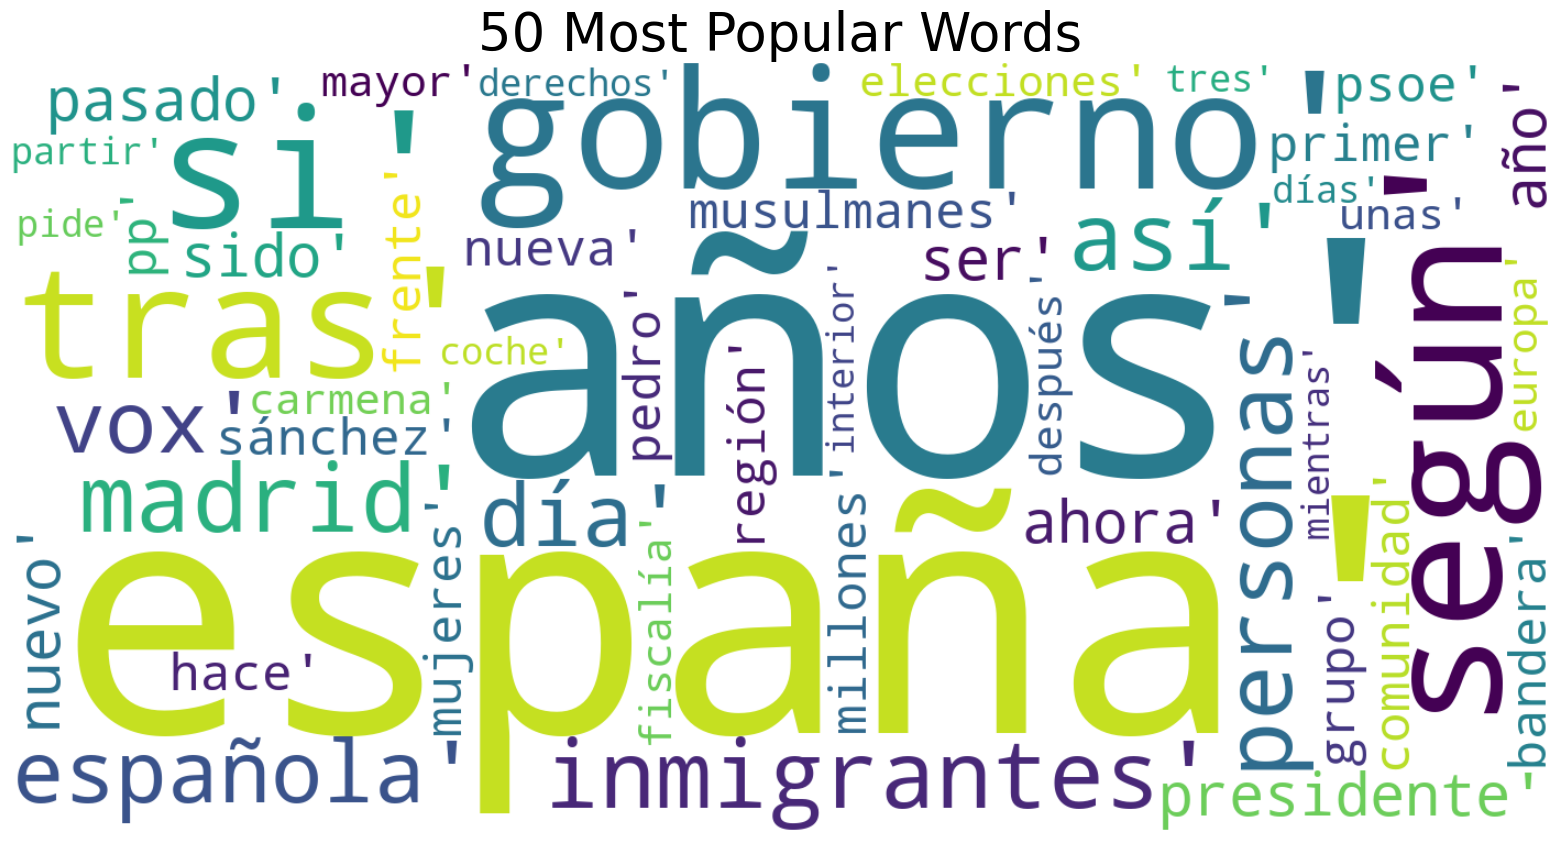

In [64]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=50,
    label_type=None
)

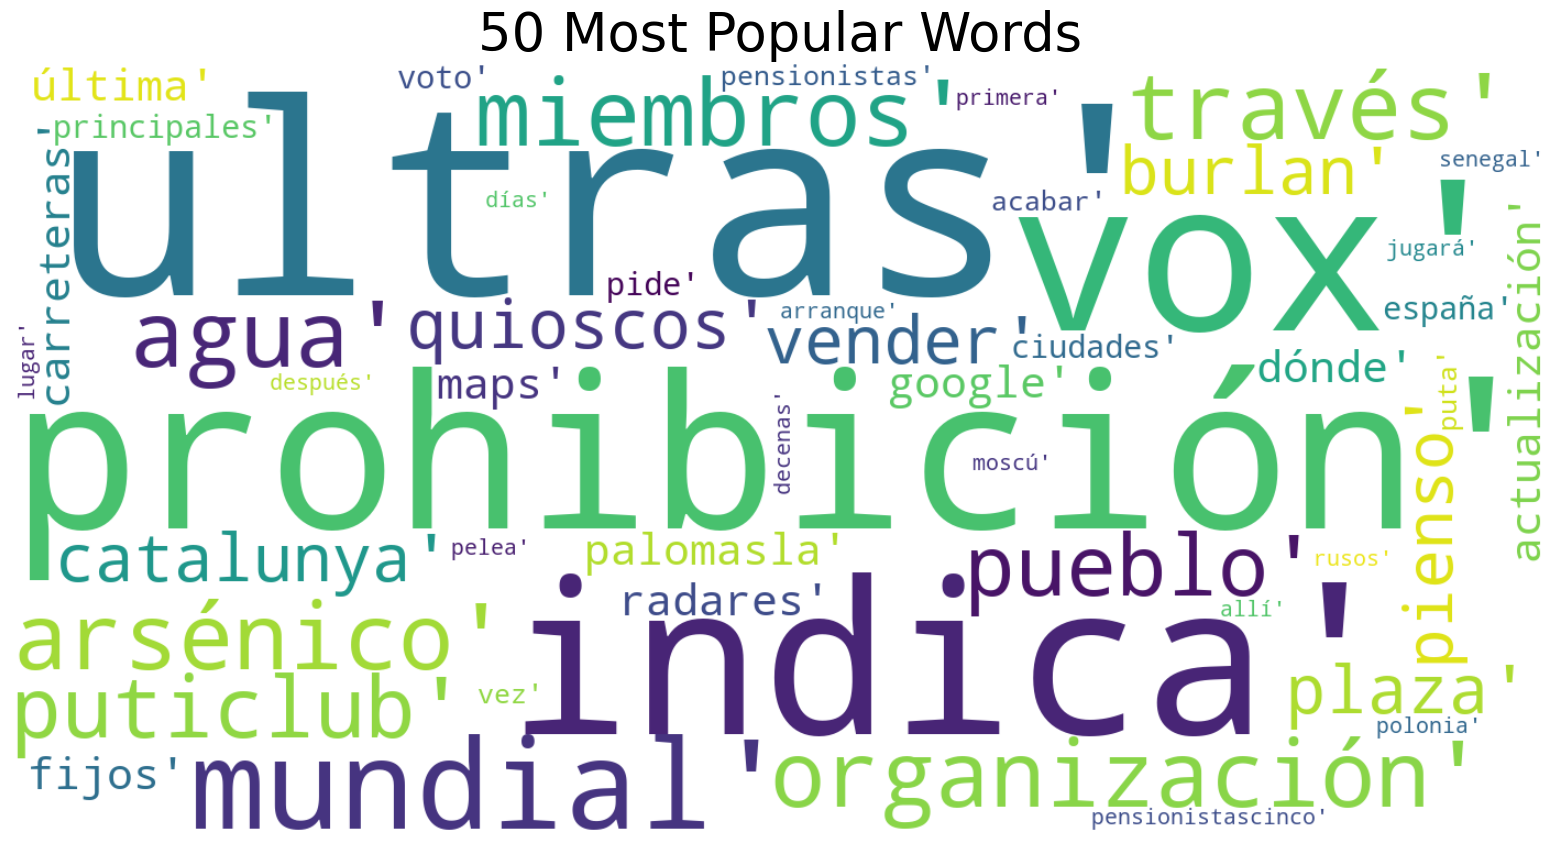

In [65]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=50,
    label_type=None
)

#### 3.4 Most Popular Words Histogram

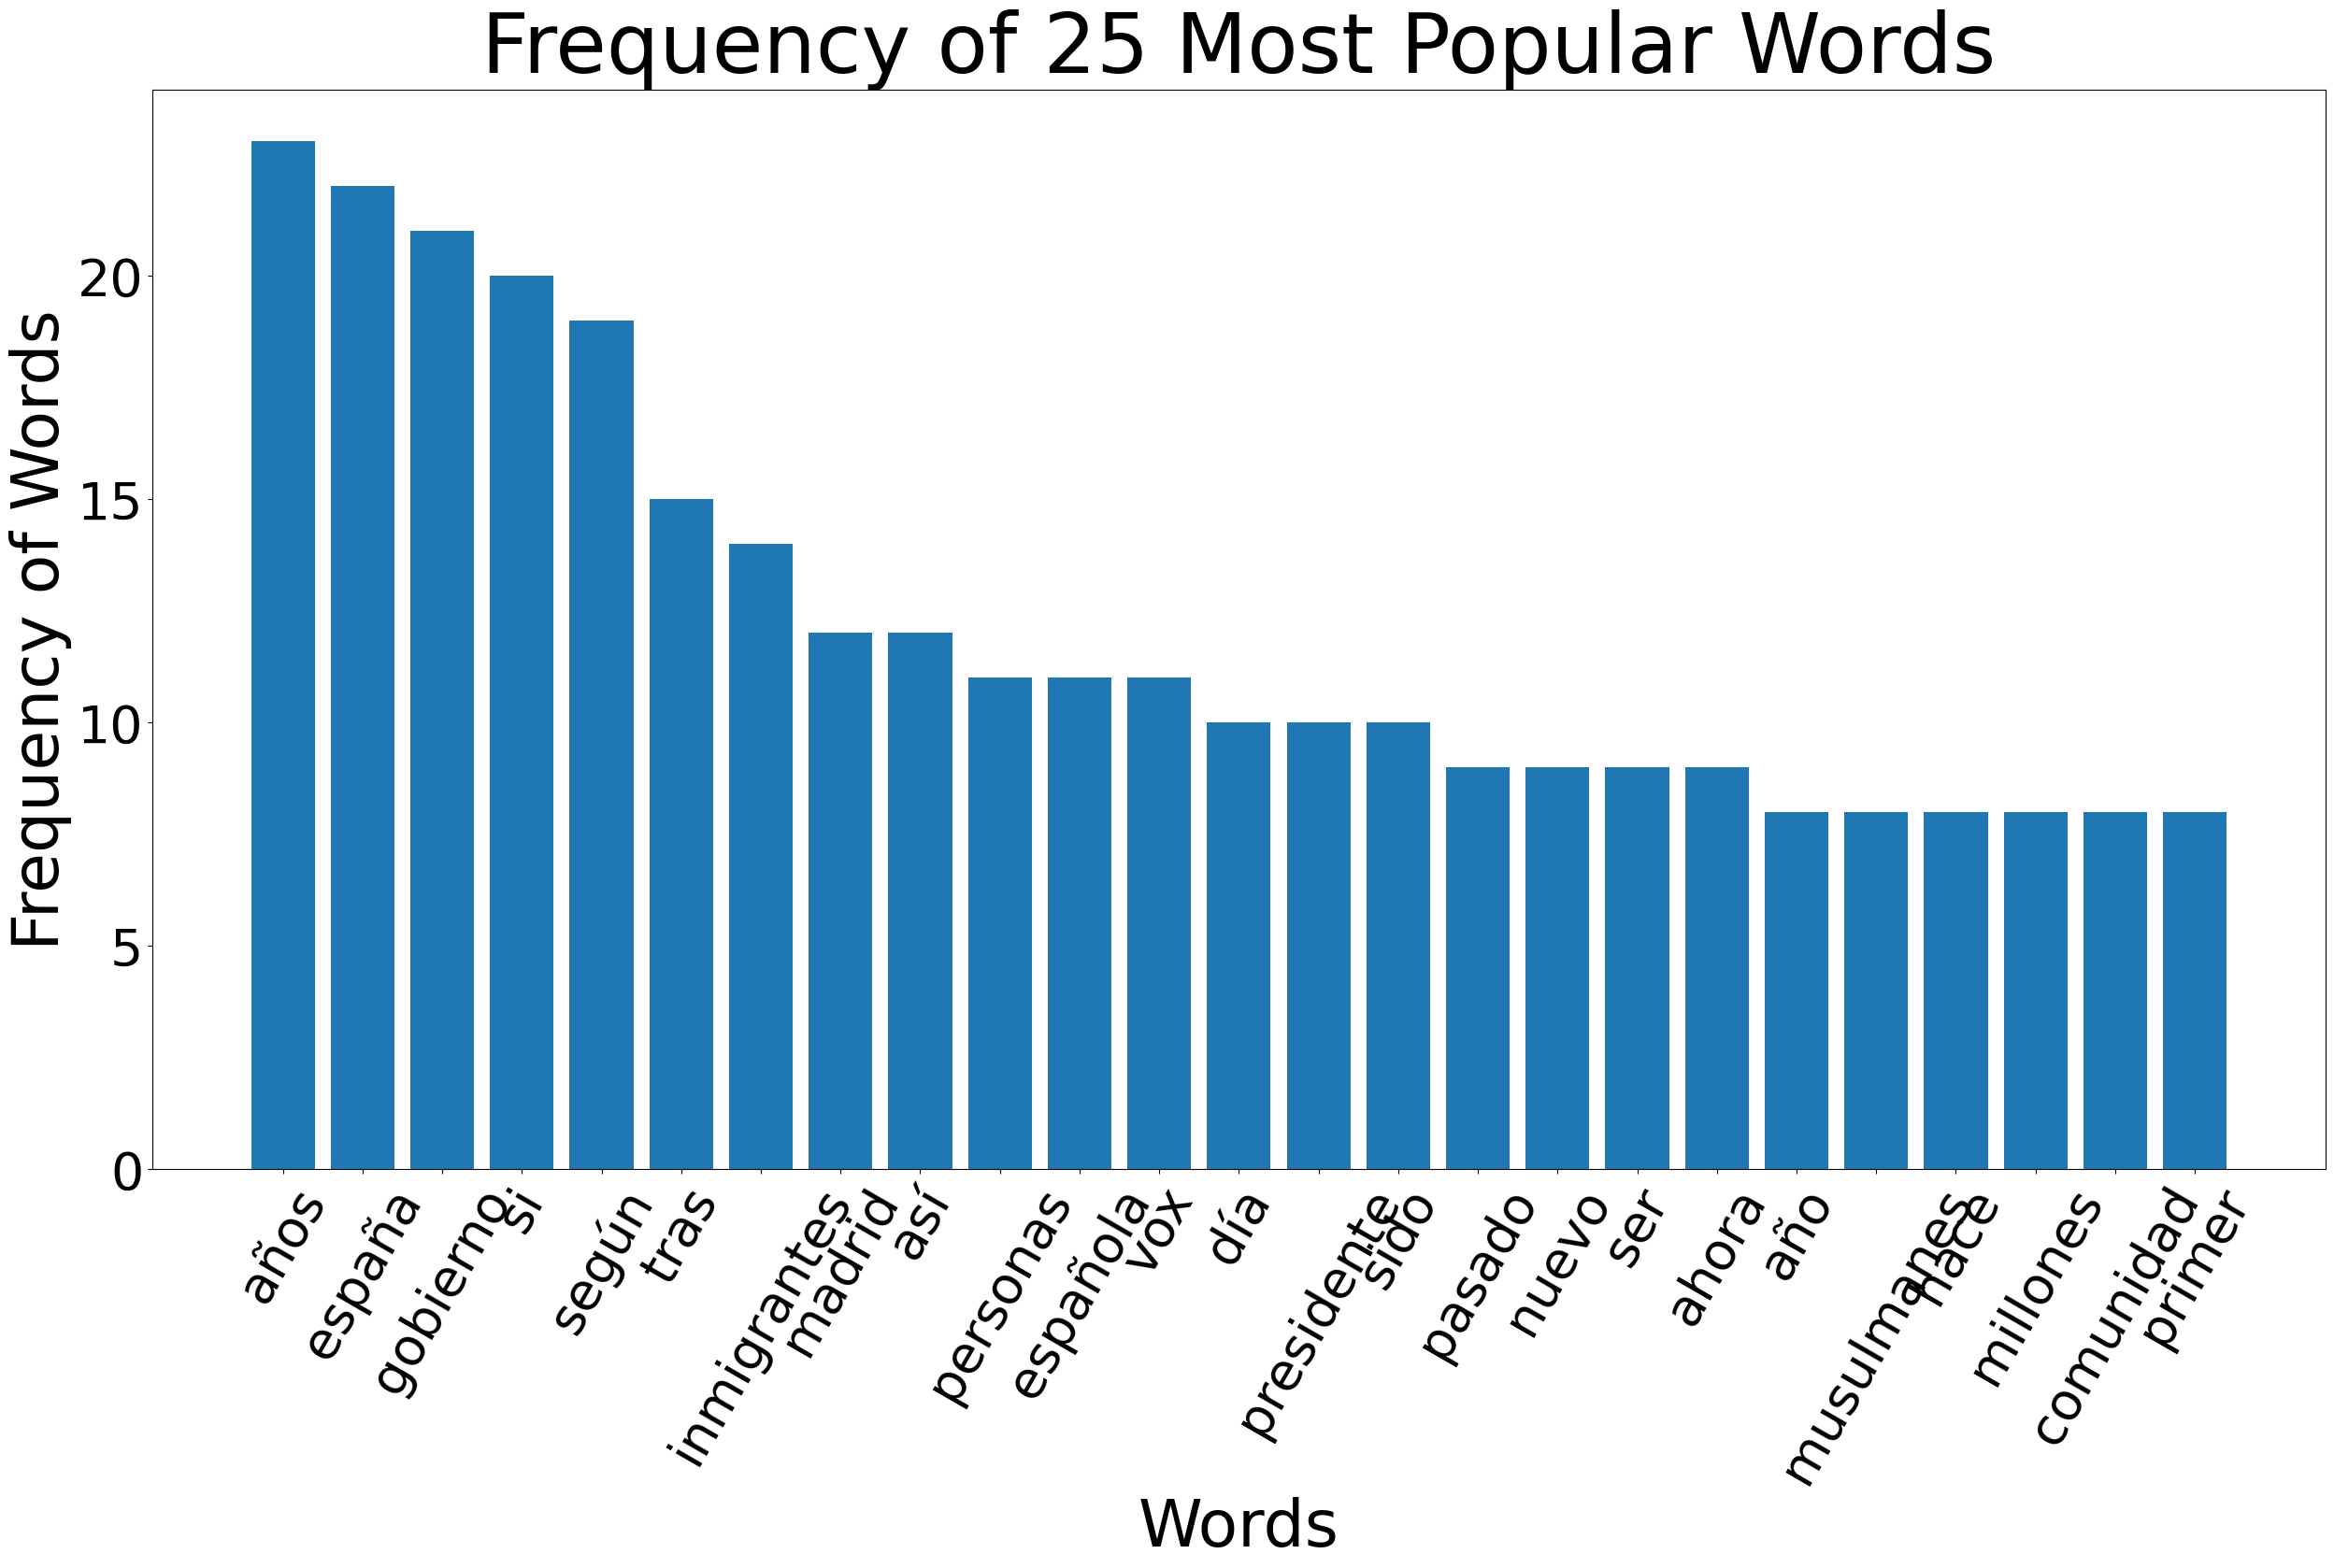

In [66]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=25,
    label_type=None
)

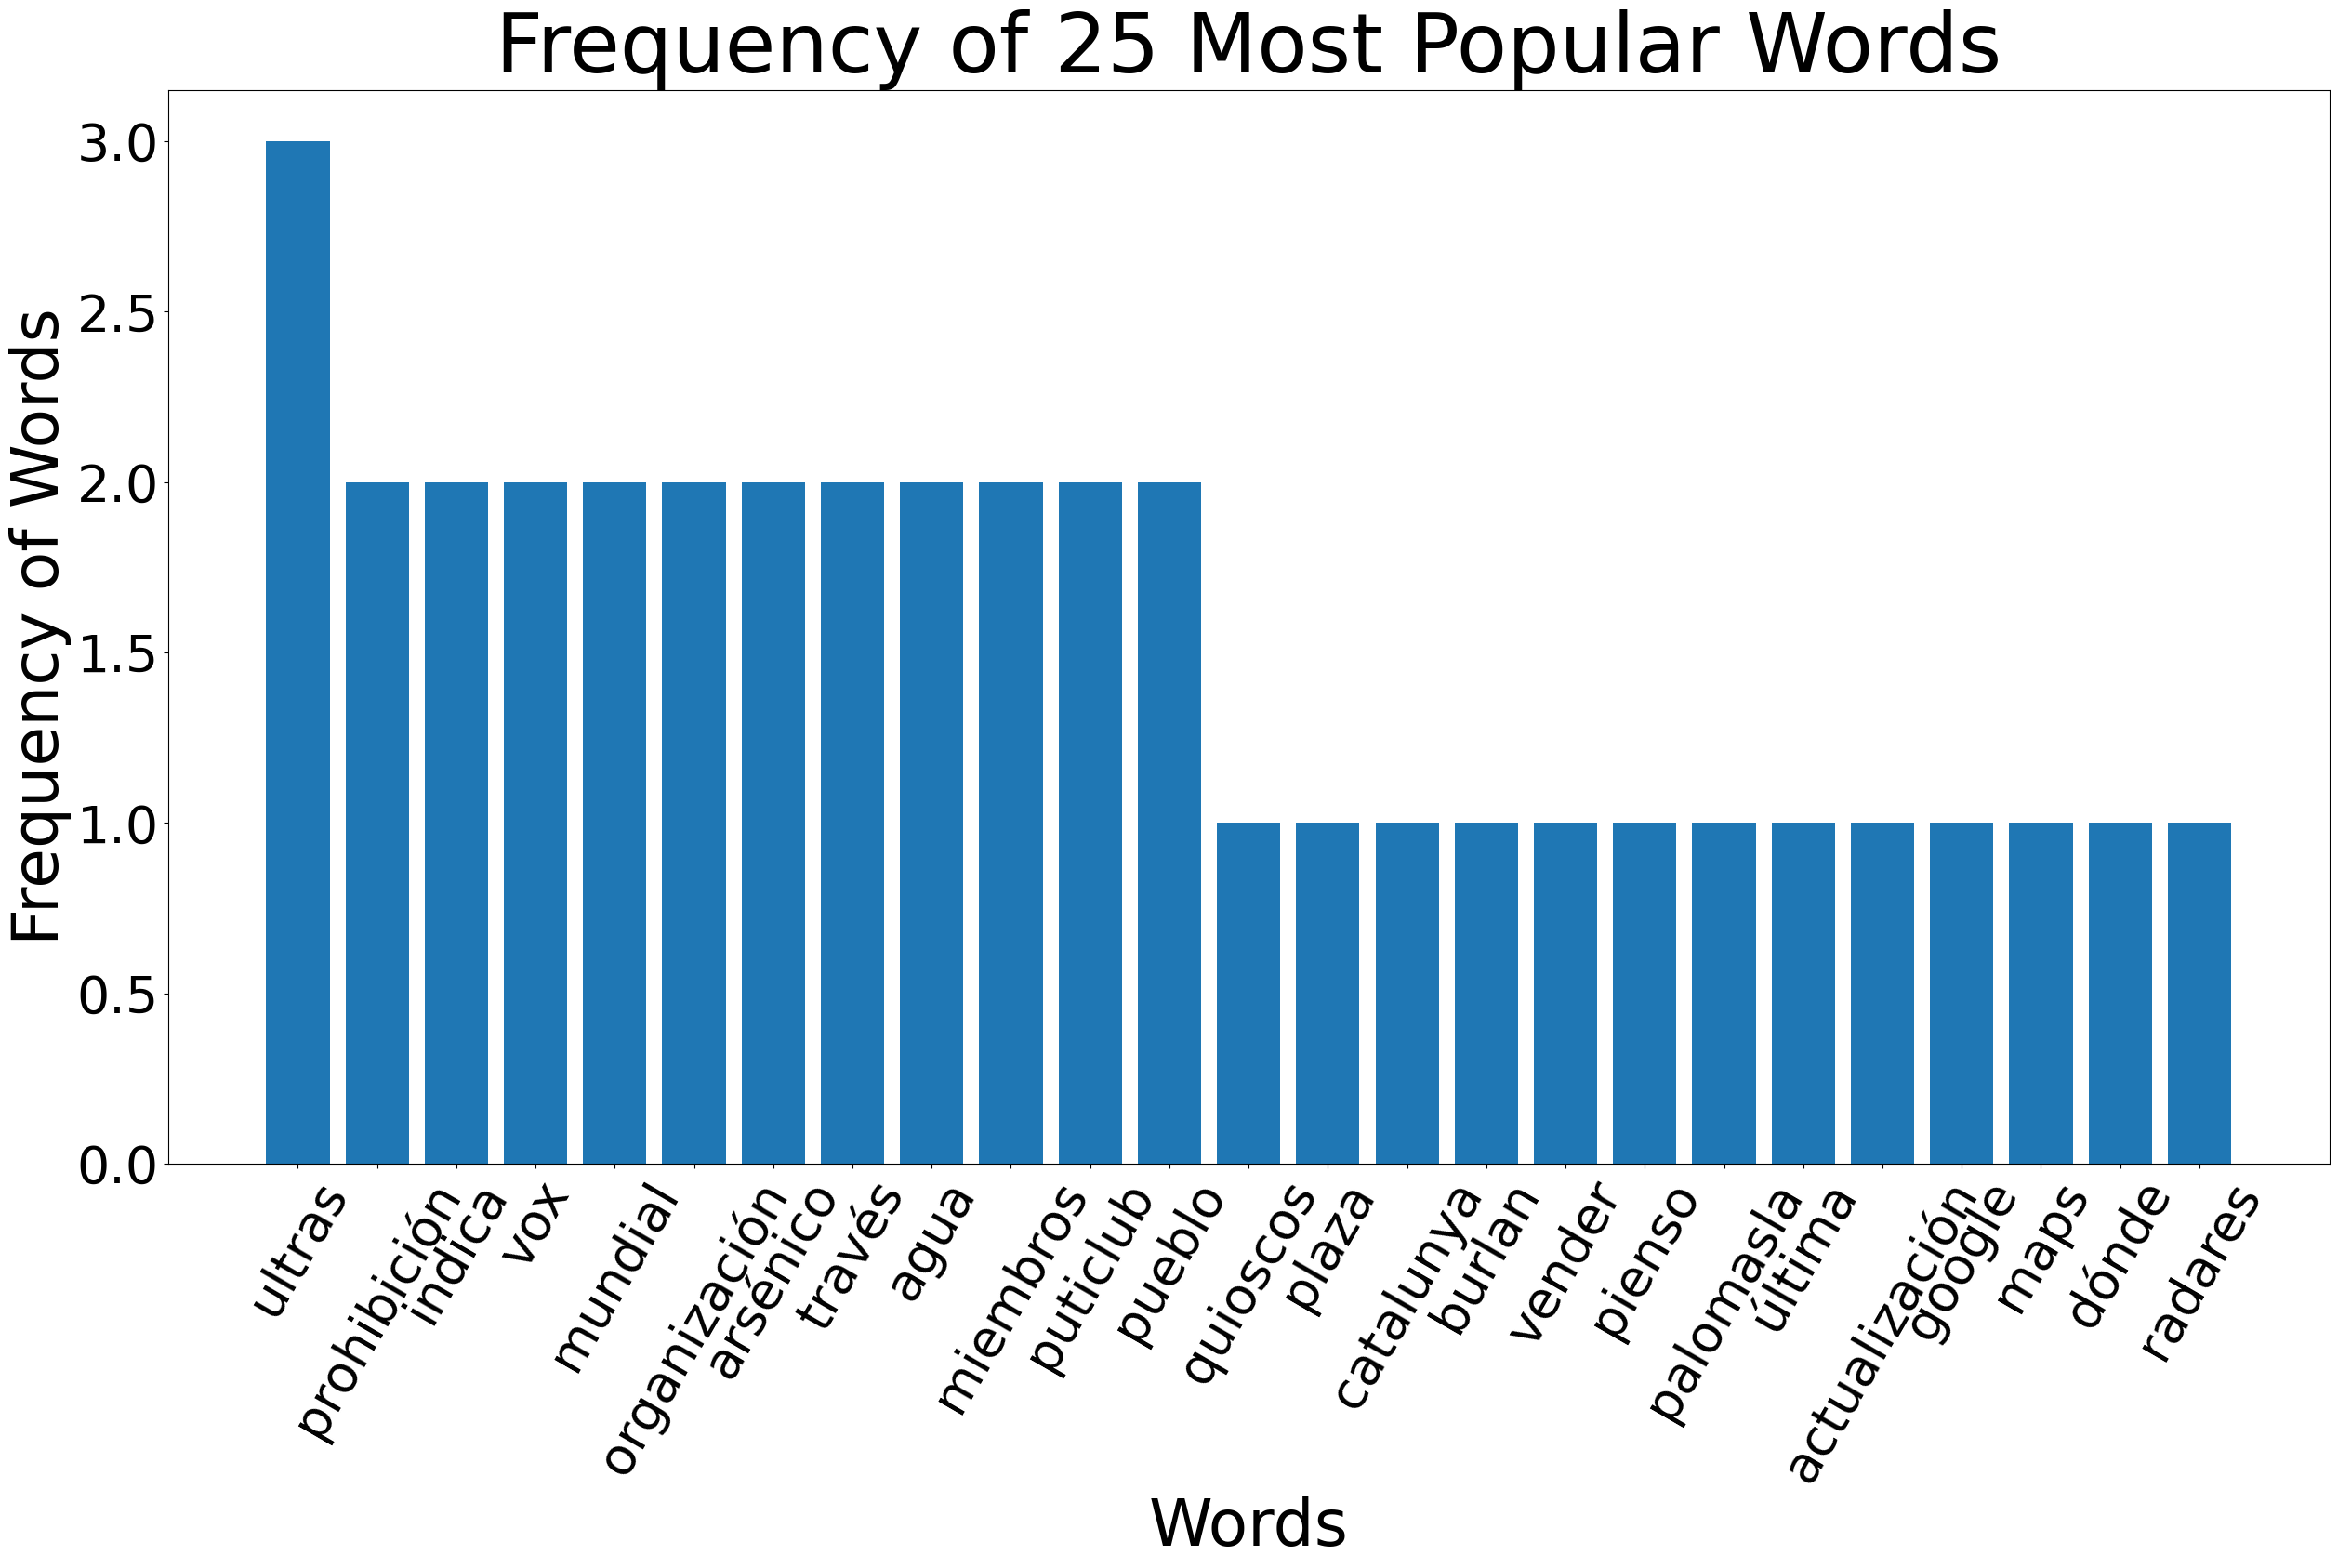

In [67]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=25,
    label_type=None
)